In [173]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats 
import pylab

In [174]:
#Load data from csv file
data = pd.read_csv('hmelq.csv')
#diplay first 5 rows
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [175]:
#clearing missing data
data = data.dropna() 

In [176]:
#missing value control in features
data.isnull().sum().any()

False

In [177]:
#data includes how many rows and columns
data.shape

(2018, 13)

In [178]:
#getting an overview of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [179]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [180]:
df = data.drop(['bad', 'reason', 'job'], axis=1)
df.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


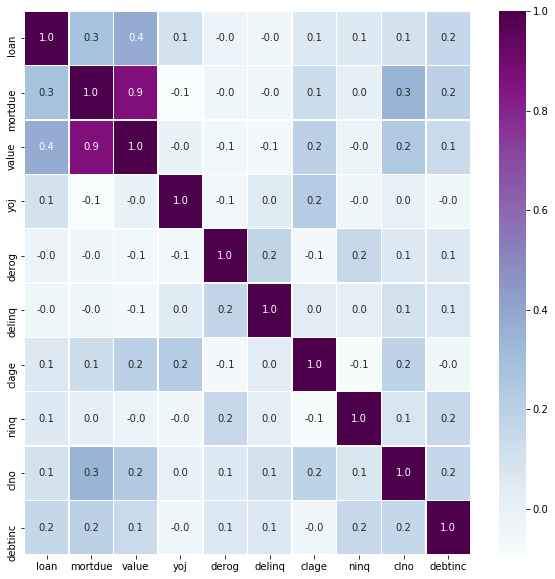

In [181]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax,cmap="BuPu")
plt.show()

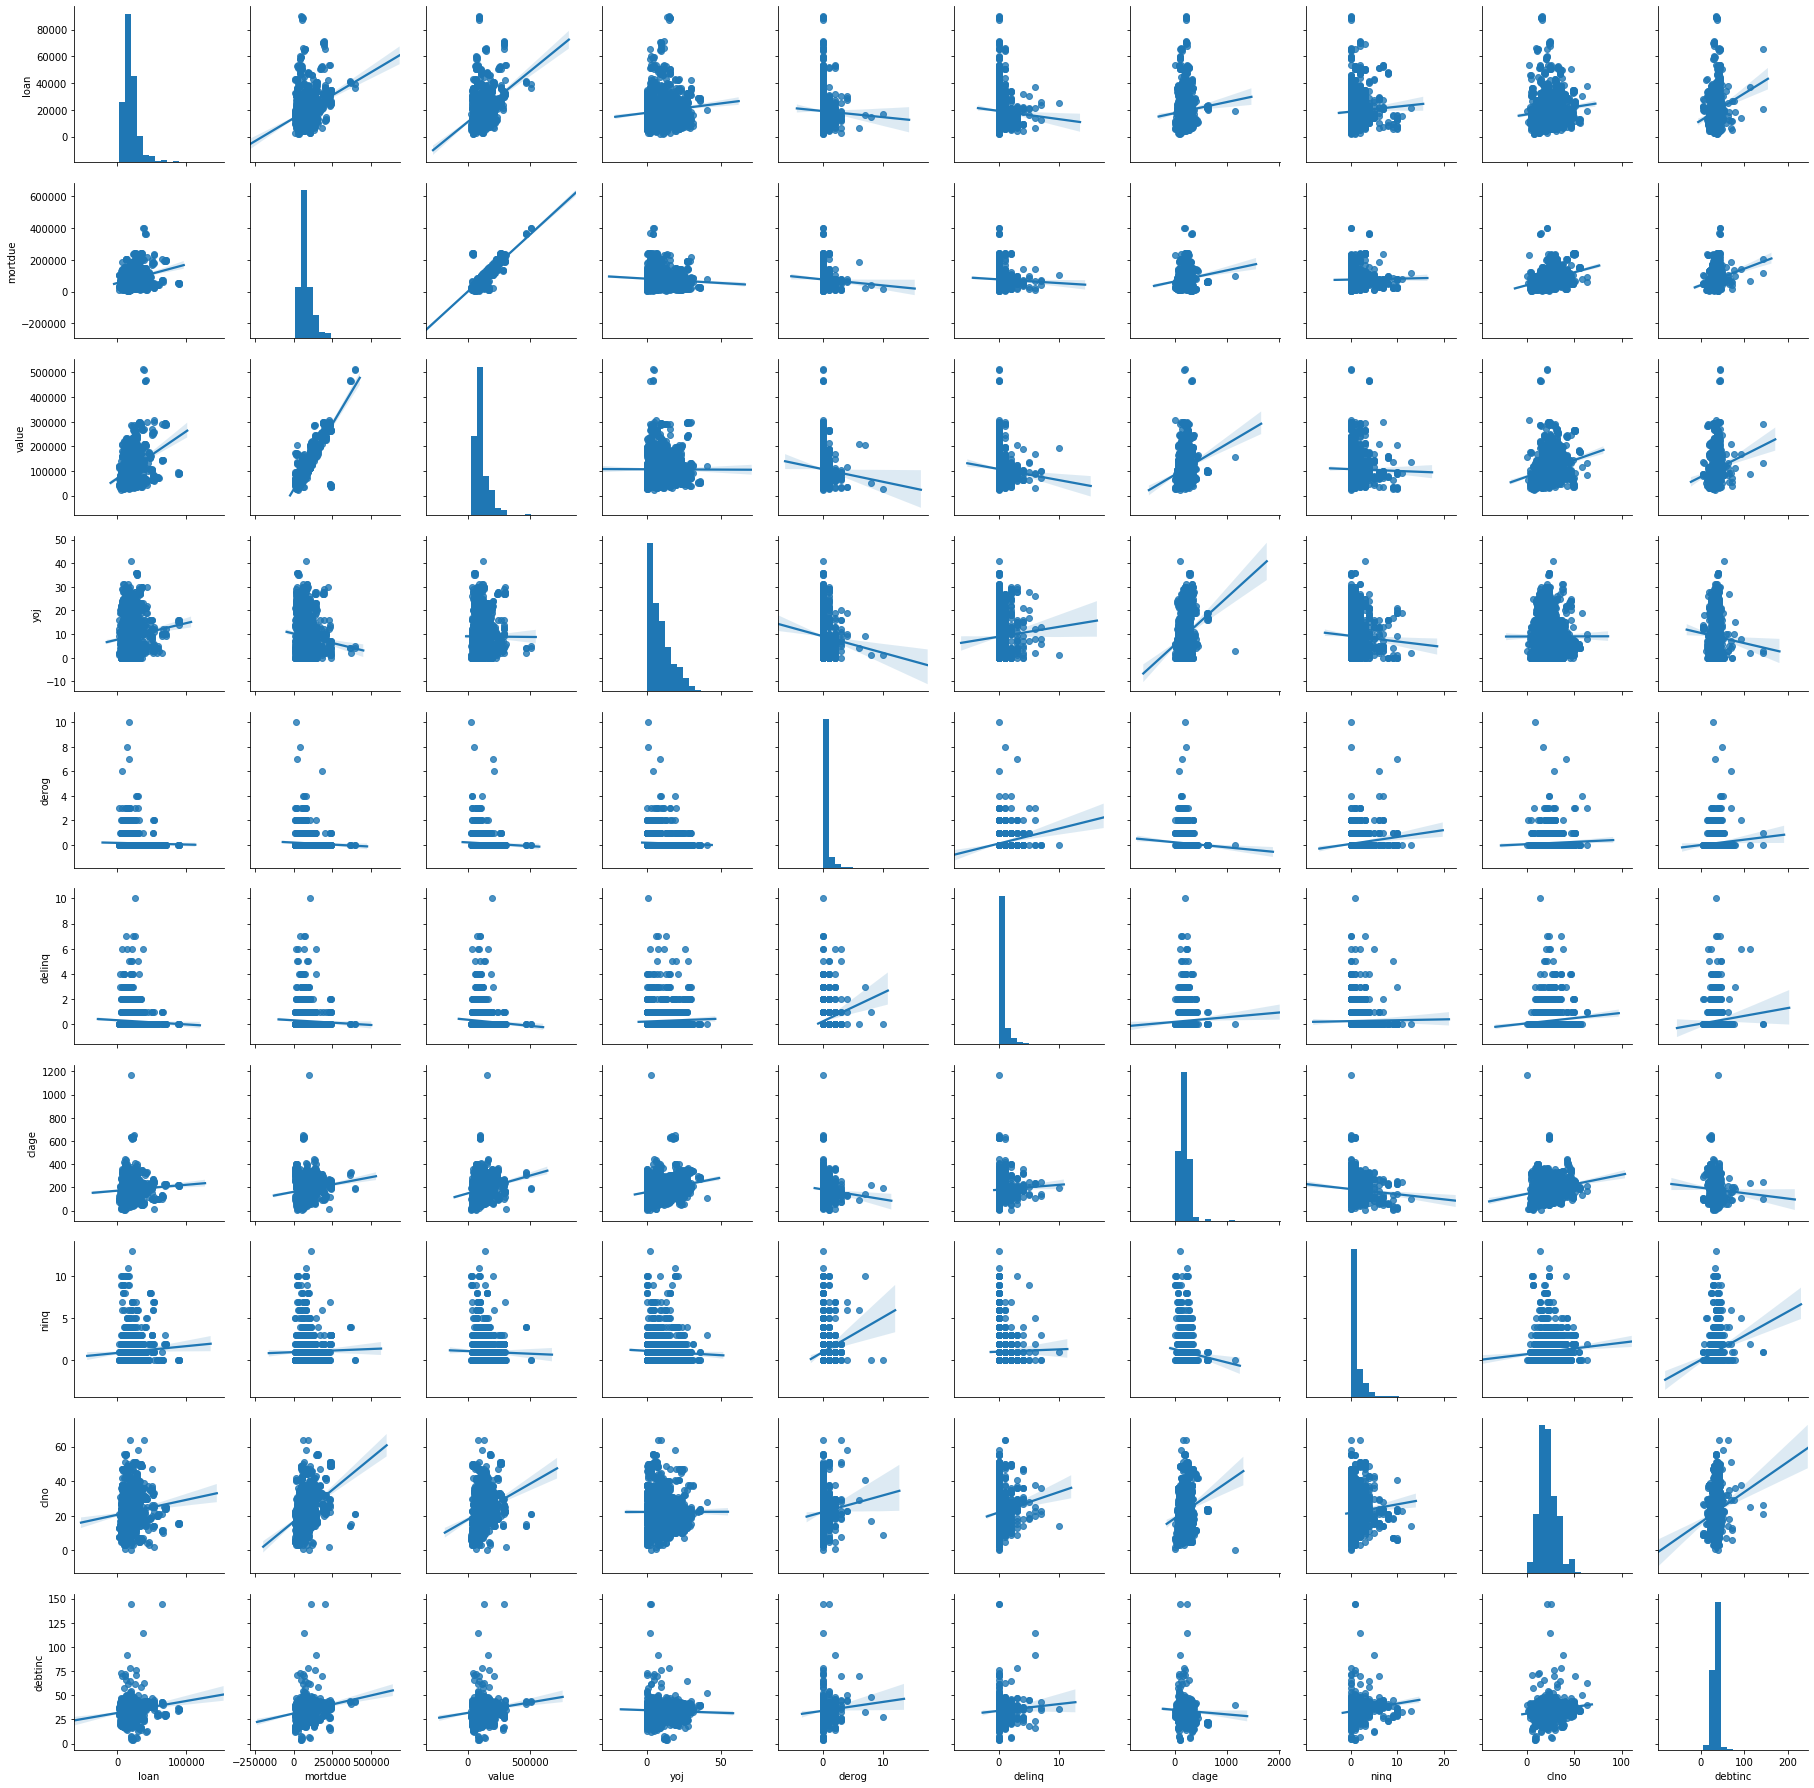

In [182]:
sns.pairplot(df, kind="reg")

#### Simple Linear Regression

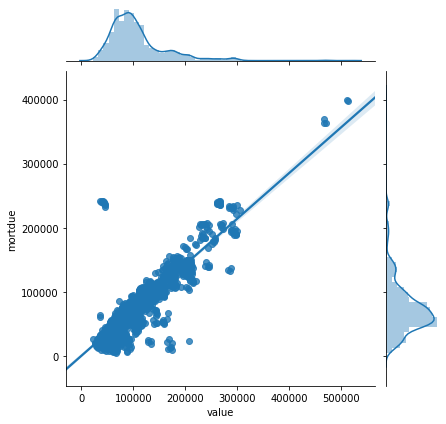

In [183]:
sns.jointplot(x="value", y="mortdue", data=data, kind="reg")

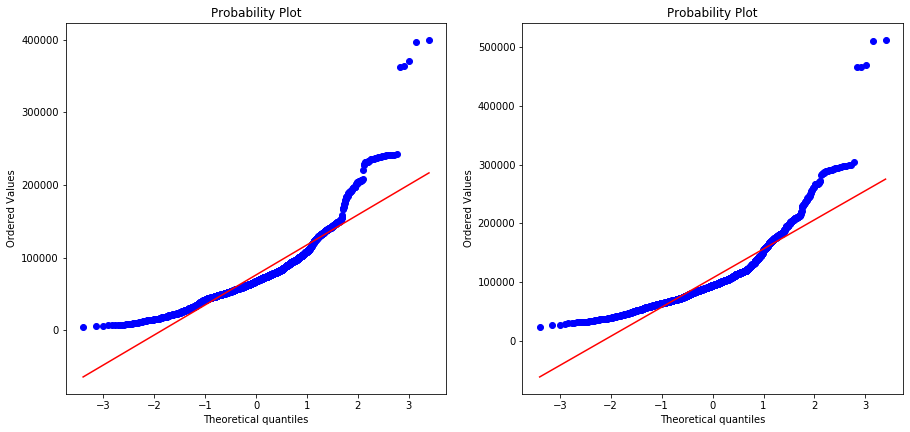

In [184]:
plt.figure(figsize=(15,15))
plt.subplot(221)
stats.probplot(df['mortdue'], dist='norm', plot=plt) #normal probability 
plt.subplot(222)
stats.probplot(df['value'], dist='norm', plot=plt) 
plt.show()

In [185]:
X= df[["mortdue"]]
X = sm.add_constant(X)
X.head()

,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [186]:
y= df['value']
y.head()

153    136877.0
154     96784.0
155     36486.0
156     76718.0
157     43684.0
Name: value, dtype: float64

In [187]:
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Sat, 21 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:16:39   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
print("Value = "+ str("%.2f" % lm.params[0]) + "+ mortdue" + "*" + str("%.2f" %lm.params[1]))

Value = 26469.27+ mortdue*1.05


In [189]:
k_t = pd.DataFrame({'gercek_y':y,'tahmin_y':lm.predict(X)})
k_t['hata'] = k_t['gercek_y'] - k_t['tahmin_y']
k_t['hata_kare'] = k_t['hata']**2
k_t[0:10]

,gercek_y,tahmin_y,hata,hata_kare
153,136877.0,126275.218545,10601.781455,1.123978e+08
154,96784.0,109957.856961,-13173.856961,1.735505e+08
155,36486.0,281371.808888,-244885.808888,5.996906e+10
156,76718.0,92835.532230,-16117.532230,2.597748e+08
157,43684.0,53714.744755,-10030.744755,1.006158e+08
158,183533.0,174321.192949,9211.807051,8.485739e+07
159,97394.0,100969.453030,-3575.453030,1.278386e+07
160,114906.0,110139.079030,4766.920970,2.272354e+07
161,103016.0,108816.790092,-5800.790092,3.364917e+07
162,87025.0,80478.715760,6546.284240,4.285384e+07


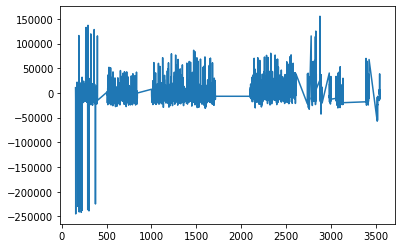

In [190]:
plt.plot(lm.resid)

Text(0.5, 0, 'value')

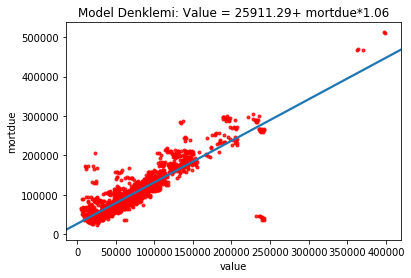

In [191]:
g = sns.regplot(df["mortdue"],df["value"],ci=None,scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Value = 25911.29+ mortdue*1.06")
g.set_ylabel("mortdue")
g.set_xlabel("value")

#### Multiple Linear Regression

In [192]:
dms = pd.get_dummies(data[["reason", "job"]])
dms.tail()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
3544,0,1,0,0,0,0,0,1
3546,0,1,0,0,0,0,0,1
3547,1,0,0,0,0,0,0,1
3548,0,1,0,0,0,0,0,1
3549,0,1,0,0,0,0,0,1


In [193]:
y=data["value"]
X_ = data.drop(["reason", "job", "value"], axis=1).astype("float64")
X= pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_Other", "job_ProfEx", "job_Sales", "job_Self"]]], axis=1)
X.head()

,bad,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,0.0,18200.0,94727.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0,0
154,0.0,21700.0,79240.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0,0
155,0.0,34100.0,241931.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0,0
156,0.0,8400.0,62989.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,0,0,0,0,0
157,0.0,17400.0,25859.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0,0


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1614, 17)
y_train shape: (1614,)
X_test shape: (404, 17)
y_test shape: (404,)


In [195]:
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     390.0
Date:                Sat, 21 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:16:40   Log-Likelihood:                -18605.
No. Observations:                1614   AIC:                         3.724e+04
Df Residuals:                    1597   BIC:                         3.733e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
bad             3469.1999   2394.585      1.449      0.148   -1227.659    8166.059
loan               0.7110      0.062     11.520      0.000       0.590       0.832
mortdue            1.0192      0.016     62.595      0.000       0.987       1.051
yoj              363.8475     85.775      4.242      0.000     195.605     532.090
derog           2055.7229   1203.292      1.708      0.088    -304.475    4415.921
delinq         -2123.2502    819.240     -2.592      0.010   -3730.150    -516.351
clage             42.8989      7.700      5.571      0.000      27.795      58.003
ninq            -529.5903    388.048     -1.365      0.173   -1290.727     231.546
clno            -494.4450     71.097     -6.954      0.000    -633.899    -354.991
debtinc         -155.6272     77.284     -2.014      0.044    -307.216      -4.038
reason_DebtCon -2686.4917   1417.349     -1.895      0.058   -5466.553      93.569
job_Mgr          1.78e+04   3707.899      4.800      0.000    1.05e+04    2.51e+04
job_Office       2.27e+04   3549.564      6.395      0.000    1.57e+04    2.97e+04
job_Other       2.002e+04   3307.887      6.054      0.000    1.35e+04    2.65e+04
job_ProfEx      3.045e+04   3475.245      8.761      0.000    2.36e+04    3.73e+04
job_Sales       2.333e+04   5948.271      3.922      0.000    1.17e+04     3.5e+04
job_Self        2.913e+04   5273.647      5.523      0.000    1.88e+04    3.95e+04
==============================================================================
Omnibus:                     1010.060   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72065.192
Skew:                          -2.136   Prob(JB):                         0.00
Kurtosis:                      35.455   Cond. No.                     1.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

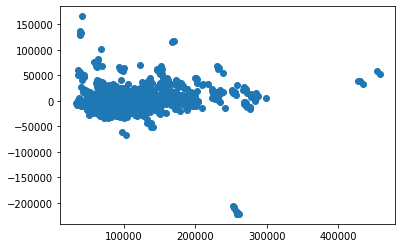

In [196]:
resid = lm.resid
plt.scatter(lm.predict(), resid)

In [197]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(X_train, y_train)

In [198]:
y_pred=model.predict(X_test)
print(r2_score(y_test, y_pred))

0.7948806467676854


In [199]:
k_t = pd.DataFrame({'gercek_y':y_test,'tahmin_y':model.predict(X_test)})
k_t['hata'] = k_t['gercek_y'] - k_t['tahmin_y']
k_t['hata_kare'] = k_t['hata']**2
k_t[0:10]

,gercek_y,tahmin_y,hata,hata_kare
2400,131913.0,128694.717280,3218.282720,1.035734e+07
800,178045.0,138719.532709,39325.467291,1.546492e+09
663,160487.0,151743.495516,8743.504484,7.644887e+07
2782,165315.0,62187.733129,103127.266871,1.063523e+10
703,115750.0,130165.816438,-14415.816438,2.078158e+08
1609,54378.0,72866.665290,-18488.665290,3.418307e+08
1534,95105.0,90380.439424,4724.560576,2.232147e+07
699,180304.0,133280.265523,47023.734477,2.211232e+09
2796,289430.0,273580.042850,15849.957150,2.512211e+08
804,103246.0,89173.296699,14072.703301,1.980410e+08


In [200]:
from sklearn.metrics import mean_squared_error, r2_score
train_mse = np.sqrt(mean_squared_error(y_train, lm.predict(X_train)))
test_mse = np.sqrt(mean_squared_error(y_test, lm.predict(X_test)))
                   
print('train_mse:', train_mse)
print('test_mse:', test_mse)
#train deki ve test deki erorlarıma bakıyorum ve sonuçların birbirine yakın olmasını bekliyorum

train_mse: 24539.382774996906
test_mse: 23782.477352973514


#### PCA

In [201]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [202]:
X_reduced_train = pca.fit_transform(scale(X_train))
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
print('constant:', pcr_model.intercept_)
print('coefficient', pcr_model.coef_)

constant: 106212.04089219331
coefficient [ 2.57870447e+04 -2.20627810e+03 -7.38377407e+03  5.23880130e+03
  1.69464461e+01 -4.98526354e+03 -2.46370459e+03 -1.32762705e+03
  3.90400364e+03  1.00757404e+03  2.01306828e+03  8.66450279e+03
  1.02390604e+04  1.05401825e+04 -2.35124605e+04 -2.31630973e+04
  1.06588783e-18]


In [203]:
y_pred = pcr_model.predict(X_reduced_train)
print(np.sqrt(mean_squared_error(y_train, y_pred)))
print(r2_score(y_train, y_pred))

24539.382774996906
0.7962248723649512


In [204]:
#cross validation
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
lm = LinearRegression()

In [205]:
RMSE = []
for i in np.arange(1, X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm, X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv=cv_10,
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [206]:
RMSE

[39699.24141660014,
 39618.09268139819,
 38686.81752179816,
 38214.65436361522,
 38238.676418027506,
 37900.48444268441,
 37852.386325443855,
 37854.13066691178,
 37728.971336900875,
 37781.73550998433,
 37814.68177514443,
 37103.61933241835,
 36262.476867761834,
 35248.70511869327,
 30128.498688726682,
 25064.36152563424,
 25057.460250725748]

Text(0.5, 1.0, 'value tahmin modeli için PCR Model Tuning')

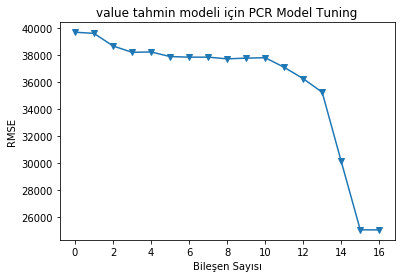

In [207]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('value tahmin modeli için PCR Model Tuning')